In [8]:
from cv2 import imread, CascadeClassifier, cvtColor
from matplotlib import pyplot as plt
import os, time, sys, cv2
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1
    block = int(round(bar_length * progress))
    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)
    
# Load the pre-trained model
classifier = CascadeClassifier('haarcascade_frontalface_alt.xml')

def process_pixels_of_image(pixels, image_name, classifier):
    # perform face detection
    bboxes = classifier.detectMultiScale(pixels)
    index = 0

    # print bounding box for each detected face
    for box in bboxes:
        index = index + 1
        # extract
        x, y, width, height = box        
        x2, y2 = x + int(width * 1.3), y + int(height * 1.3)
        cx1, cy1 = x - int(width * 0.3), y - int(height * 0.3)
        cx2, cy2 = x2 + int(width * 0.3), y2 + int(height * 0.3)
        if (cy1 >= 0):
            cropped = pixels[cy1:cy2, cx1:cx2]
            # Save new face in the data
            plt.imshow(cropped)
            plt.title('Found')
            # Commented for more speed
            #plt.show()
            plt.imsave('processed\\' + str(index) + '_' + image_name + '.png', cropped)

Progress: [####################] 100.0%


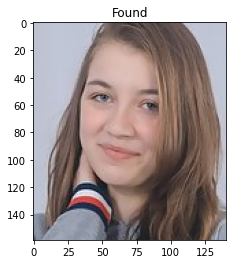

In [9]:
# Process source dir
for dirpath, dirs, files in os.walk("source"):
    path = dirpath.split('/')
    number_of_elements = len(files)
    i = 0
    
    for f in files:
        try:
            print(str(path[0]) + '\\' + f)
            pixels = imread(str(path[0]) + '\\' + f)
            pixels = cvtColor(pixels, cv2.COLOR_BGR2RGB)
            process_pixels_of_image(pixels, f, classifier)
        except:
            continue
        update_progress(i / number_of_elements)
        i = i + 1
    update_progress(1.0)